In [1]:
# Enable further imports

import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import matplotlib.pyplot as plt
import torch

from torch.nn import ModuleList, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader, random_split

from sklearn.metrics import classification_report

from tqdm.notebook import tqdm

from data import BiasedCifar10

from models import MLPEncoder, ConvEncoder, Classifier, Adversary

from train import Trainer

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

mps


In [4]:
p_y_a = [
    [0.9 if i == j else 0.1 / 9 for i in range(10)]
    for j in range(10)
]
p_a = [1/10] * 10

data_dir = os.path.join(project_root, "data/cifar_data")
biased_cifar = BiasedCifar10(data_dir, p_y_a, p_a, train=True, download=True, seed=42)

Image shape: torch.Size([3, 32, 32])
Spurious attribute: tensor(6)
True label: tensor(6)


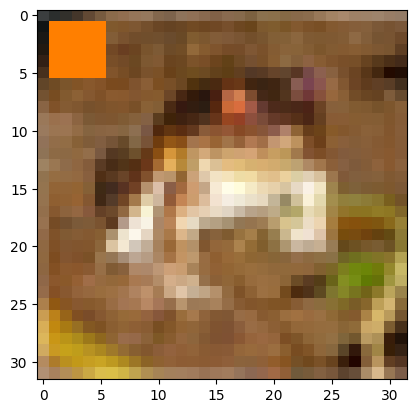

In [5]:
img, attr, label = biased_cifar[0]
print("Image shape:", img.shape)
print("Spurious attribute:", attr)
print("True label:", label)

plt.imshow(img.permute(1, 2, 0).cpu().numpy())
plt.show()